In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kagglehub

In [ ]:
# Get helper functions file
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/Ayush8757/PlantDiseasesDetection/refs/heads/main/helper_function.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

--2025-03-12 20:30:35--  https://raw.githubusercontent.com/Ayush8757/PlantDiseasesDetection/refs/heads/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4846 (4.7K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   4.73K  --.-KB/s    in 0s      

2025-03-12 20:30:35 (56.2 MB/s) - ‘helper_function.py’ saved [4846/4846]



In [ ]:
import helper_function

In [ ]:
import tensorflow_datasets as tfds
# Get all available datasets in TFDS
datasets_list = tfds.list_builders()

# Set our target dataset and see if it exists
target_dataset = "plant_village"
print(f"'{target_dataset}' in TensorFlow Datasets: {target_dataset in datasets_list}")

'plant_village' in TensorFlow Datasets: True


In [ ]:
import tensorflow_datasets as tfds

# Load the entire dataset as "train"
train_data, ds_info = tfds.load(
    name="plant_village",
    split="train",  # Load the entire dataset as "train"
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Manually split the data into training and testing sets
num_samples = ds_info.splits['train'].num_examples
num_test_samples = int(0.2 * num_samples)  # Use 15% for testing
num_train_samples = num_samples - num_test_samples

test_data = train_data.take(num_test_samples)
train_data = train_data.skip(num_test_samples)

# Now you have train_data and test_data variables
print(f"Training data size: {num_train_samples}")
print(f"Testing data size: {num_test_samples}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/54303 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.57XHN5_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.
Training data size: 43443
Testing data size: 10860


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=38),
})

In [ ]:
class_names = ds_info.features["label"].names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomat

In [ ]:
train_one_sample = train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from PlantVillage (tensor form): {label}
  Class name (str form): {class_names[label.numpy()] if 0 <= label.numpy() < len(class_names) else 'Unknown Class'}
        """) # Check if label.numpy() is within the valid range of class_names indices


  Image shape: (256, 256, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from PlantVillage (tensor form): 11
  Class name (str form): Grape___Black_rot
        


In [ ]:
image

<tf.Tensor: shape=(256, 256, 3), dtype=uint8, numpy=
array([[[ 77,  71,  75],
        [ 76,  70,  74],
        [ 78,  72,  76],
        ...,
        [121, 111, 109],
        [119, 109, 107],
        [133, 123, 121]],

       [[ 77,  71,  75],
        [ 76,  70,  74],
        [ 78,  72,  76],
        ...,
        [122, 112, 110],
        [113, 103, 101],
        [118, 108, 106]],

       [[ 78,  72,  76],
        [ 76,  70,  74],
        [ 77,  71,  75],
        ...,
        [121, 111, 109],
        [111, 101,  99],
        [124, 114, 112]],

       ...,

       [[140, 141, 136],
        [137, 138, 133],
        [135, 136, 131],
        ...,
        [152, 151, 147],
        [143, 142, 138],
        [153, 152, 148]],

       [[137, 138, 133],
        [134, 135, 130],
        [132, 133, 128],
        ...,
        [151, 150, 146],
        [143, 142, 138],
        [153, 152, 148]],

       [[136, 137, 132],
        [134, 135, 130],
        [133, 134, 129],
        ...,
        [158, 157, 15

In [ ]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=228>)

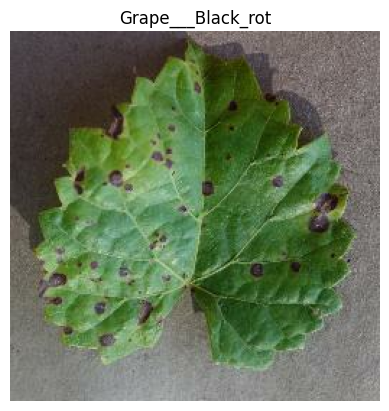

In [ ]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]) # add title to image by indexing on class_names list
plt.axis(False);

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [ ]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[ 77  71  75]
  [ 76  70  74]
  [ 78  72  76]
  ...
  [121 111 109]
  [119 109 107]
  [133 123 121]]

 [[ 77  71  75]
  [ 76  70  74]
  [ 78  72  76]
  ...
  [122 112 110]
  [113 103 101]
  [118 108 106]]]...,
Shape: (256, 256, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 76.92857   70.92857   74.92857 ]
  [ 76.42857   70.42857   74.42857 ]
  [ 79.7602    73.7602    77.7602  ]
  ...
  [121.86222  111.86222  109.86222 ]
  [119.107124 109.107124 107.107124]
  [130.97472  120.974724 118.974724]]

 [[ 77.127556  71.127556  75.127556]
  [ 76.38265   70.38265   74.38265 ]
  [ 79.29082   73.29082   77.29082 ]
  ...
  [118.62254  108.62254  106.62254 ]
  [114.54586  104.54586  102.54586 ]
  [118.806244 108.806244 106.806244]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


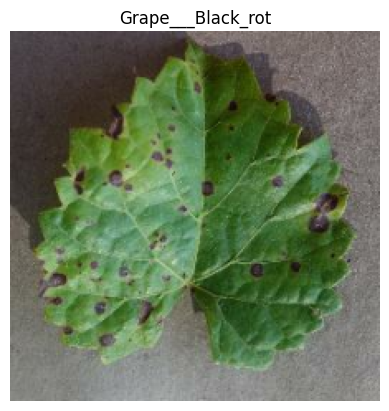

In [ ]:
# We can still plot our preprocessed image as long as we
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

In [ ]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.weights.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Using tf.keras.layers.Rescaling directly if your TensorFlow version supports it (e.g., 2.10+)
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.Rescaling(1./255)  # Using layers.Rescaling
], name ="data_augmentation")

In [ ]:
# Create a function to recreate the original model outside of the fit method
def create_model():
    input_shape = (224, 224, 3)
    base_model = tf.keras.applications.ResNet50V2(include_top=False)
    base_model.trainable = False  # freeze base model layers

    # Create Functional model
    inputs = layers.Input(shape=input_shape, name="input_layer")
    # Add in data augmentation Sequential model as a layer
    x = data_augmentation(inputs)
    x = base_model(inputs, training=False)  # set base_model to inference mode only
    x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
    x = layers.Dense(len(class_names))(x)  # want one output neuron per class
    outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# Create the model before fitting
model = create_model()

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Continue with the rest of your code

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_layer                        │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 38)                  │          77,862 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_2 (Cast)                        │ (None, 38)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_float32 (Activation)         │ (None, 38)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,642,662 (90.19 MB)

 Trainable params: 77,862 (304.15 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
from helper_function import create_tensorboard_callback

# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.15 * len(test_data)),
                    callbacks=[create_tensorboard_callback("training_logs","ResNet_PlantVillage"),
                               model_checkpoint])

Saving TensorBoard log files to: training_logs/ResNet_PlantVillage/20250312-204043
Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 48ms/step - accuracy: 0.2935 - loss: 26.6870 - val_accuracy: 0.5607 - val_loss: 9.0508
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.5321 - loss: 9.8200 - val_accuracy: 0.5129 - val_loss: 12.8426
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.5881 - loss: 9.2279 - val_accuracy: 0.4375 - val_loss: 20.7982
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 82ms/step - accuracy: 0.6167 - loss: 9.3471 - val_accuracy: 0.5460 - val_loss: 14.1305
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6395 - loss: 9.4230 - val_accuracy: 0.5821 - val_loss: 11.7187


In [ ]:
# Evaluate model (unsaved version) on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

340/340 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.5911 - loss: 11.5403


[11.648383140563965, 0.591160237789154]

In [ ]:
created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# 3. Load the saved weights
created_model.load_weights(checkpoint_path)

# 4. Evaluate the model with loaded weights
results_created_model_with_loaded_weights = created_model.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


340/340 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.5905 - loss: 11.5791


In [ ]:
# assert np.isclose(results_feature_extract_model, results_created_model_with_loaded_weights).all(), "Loaded weights results are not close to original model."  # check if all elements in array are close
results_created_model_with_loaded_weights

[11.653694152832031, 0.5910681486129761]

In [ ]:
for layer in model.layers:
    layer.trainable = False

# Unfreeze only the last 10 layers
for layer in model.layers[-10:]:
    layer.trainable = True

# Print layer details to verify
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)


input_layer True float32 <DTypePolicy "mixed_float16">
resnet50v2 True float32 <DTypePolicy "mixed_float16">
pooling_layer True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/First.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(0.001), # 10x lower learning rate than the default
              metrics=["accuracy"])

In [ ]:
# Start to fine-tune (all layers)
history01 = model.fit(train_data,
                      epochs=100, # fine-tune for a maximum of 100 epochs
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.25 * len(test_data)), # validation during training on 25% of test data
                      callbacks=[create_tensorboard_callback("training_logs", "ResNet50V2_PlantVillageMain"), # track the model training logs
                                 model_checkpoint, # save only the best model during training
                                 early_stopping, # stop model after X epochs of no improvements
                                 reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: training_logs/ResNet50V2_PlantVillageMain/20250312-204832
Epoch 1/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 248s 125ms/step - accuracy: 0.7974 - loss: 0.7858 - val_accuracy: 0.8813 - val_loss: 0.4646 - learning_rate: 0.0010
Epoch 2/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 135s 96ms/step - accuracy: 0.9553 - loss: 0.1311 - val_accuracy: 0.8956 - val_loss: 0.3336 - learning_rate: 0.0010
Epoch 3/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 134s 94ms/step - accuracy: 0.9708 - loss: 0.0859 - val_accuracy: 0.9474 - val_loss: 0.1664 - learning_rate: 0.0010
Epoch 4/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 139s 98ms/step - accuracy: 0.9783 - loss: 0.0643 - val_accuracy: 0.9040 - val_loss: 0.3167 - learning_rate: 0.0010
Epoch 5/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9773 - loss: 0.0658
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 101ms/step - accuracy: 0.9773 - loss: 0.0658 - val_accuracy: 0.8971 - val

In [ ]:
model.save("/content/drive/My Drive/ResNet50V2_plant_village_model.h5")

In [ ]:
model.save("/content/drive/My Drive/ResNet50V2_plant_village_model.keras")

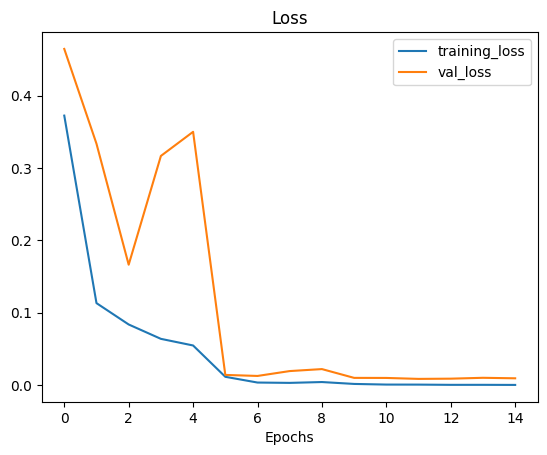

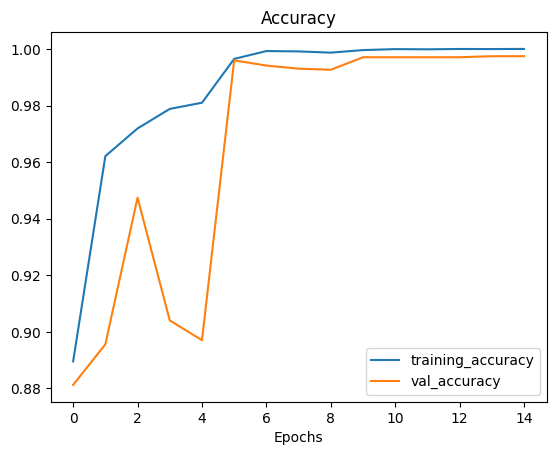

In [ ]:
from helper_function import plot_loss_curves
plot_loss_curves(history01)

In [ ]:
!zip -r model_checkpoint.zip /content/fine_tune_checkpoints
from google.colab import files
files.download("model_checkpoint.zip")

  adding: content/fine_tune_checkpoints/ (stored 0%)
  adding: content/fine_tune_checkpoints/First.keras (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r training_logs.zip /content/training_logs
files.download("training_logs.zip")


  adding: content/training_logs/ (stored 0%)
  adding: content/training_logs/ResNet_PlantVillage/ (stored 0%)
  adding: content/training_logs/ResNet_PlantVillage/20250312-204043/ (stored 0%)
  adding: content/training_logs/ResNet_PlantVillage/20250312-204043/validation/ (stored 0%)
  adding: content/training_logs/ResNet_PlantVillage/20250312-204043/validation/events.out.tfevents.1741812125.0649b7b08033.209.1.v2 (deflated 66%)
  adding: content/training_logs/ResNet_PlantVillage/20250312-204043/train/ (stored 0%)
  adding: content/training_logs/ResNet_PlantVillage/20250312-204043/train/events.out.tfevents.1741812043.0649b7b08033.209.0.v2 (deflated 97%)
  adding: content/training_logs/ResNet50V2_PlantVillageMain/ (stored 0%)
  adding: content/training_logs/ResNet50V2_PlantVillageMain/20250312-204832/ (stored 0%)
  adding: content/training_logs/ResNet50V2_PlantVillageMain/20250312-204832/validation/ (stored 0%)
  adding: content/training_logs/ResNet50V2_PlantVillageMain/20250312-204832/val

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.evaluate(test_data)

340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9972 - loss: 0.0096


[0.010783384554088116, 0.9971454739570618]